### Importing Required Packages

In [59]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Reading & Exploring the Data

In [35]:
data = pd.read_csv("Heart_disease_dataset.csv")
data.head(3)

,Name,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
0,Jane Doe,Female,55,1,1,1,140,90,100,1,...,Shows a 50% blockage in the left anterior descending coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,Mark Johnson,Male,57,1,1,1,150,80,110,1,...,Shows a 60% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"
2,Emily Davis,Female,60,1,1,1,130,85,95,1,...,Shows a 75% blockage in the left anterior descending coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, lisinopril, rosuvastatin","Angioplasty,Coronary artery bypass surgery"


In [4]:
# get overview of the statistics of data features
data.describe()

,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),LDL level (mg/dL),...,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Obesity,Murmur
count,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,...,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000,334.000000
mean,50.149701,0.880240,0.826347,0.979042,133.098802,83.203593,101.152695,0.859281,213.637725,136.916168,...,0.173653,0.137725,0.002994,0.553892,0.086826,0.122754,0.350299,0.586826,0.056886,0.458084
std,15.151935,0.325168,0.379379,0.143459,10.040121,6.947282,11.667466,0.348253,26.169645,24.484085,...,0.379379,0.345128,0.054718,0.497833,0.282003,0.328648,0.477779,0.493142,0.231973,0.498987
min,23.000000,0.000000,0.000000,0.000000,110.000000,70.000000,60.000000,0.000000,150.000000,95.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,1.000000,1.000000,1.000000,130.000000,80.000000,96.250000,1.000000,200.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,50.000000,1.000000,1.000000,1.000000,130.000000,80.000000,100.000000,1.000000,210.000000,130.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,61.500000,1.000000,1.000000,1.000000,140.000000,90.000000,110.000000,1.000000,230.000000,150.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,100.000000,1.000000,1.000000,1.000000,160.000000,110.000000,120.000000,1.000000,310.000000,240.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 49 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Name                                             334 non-null    object
 1   Gender                                           334 non-null    object
 2   Age                                              334 non-null    int64 
 3   Chest pain                                       334 non-null    int64 
 4   Shortness of breath                              334 non-null    int64 
 5   Fatigue                                          334 non-null    int64 
 6   Systolic                                         334 non-null    int64 
 7   Diastolic                                        334 non-null    int64 
 8   Heart rate (bpm)                                 334 non-null    int64 
 9   Lung sounds                                

### Data Preprocessing

#### Missing Values

In [15]:
data.isna().any()

Name                                               False
Gender                                             False
Age                                                False
Chest pain                                         False
Shortness of breath                                False
Fatigue                                            False
Systolic                                           False
Diastolic                                          False
Heart rate (bpm)                                   False
Lung sounds                                        False
Cholesterol level (mg/dL)                          False
LDL level (mg/dL)                                  False
HDL level (mg/dL)                                  False
Diabetes                                           False
Atrial fibrillation                                False
Mitral valve prolapse                              False
Rheumatic fever                                    False
Mitral stenosis                

#### Outliers

In [16]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        if data[column].dtype != object:
            q1 = np.quantile(data[column], 0.25)  # get the first quantile of the data
            q3 = np.quantile(data[column], 0.75)  # get the third quantile of thw data
            iqr = q3 - q1
            upper_bound = q3 + (1.5 * iqr)
            lower_bound = q1 - (1.5 * iqr)
            outliers = data[(data[column] > upper_bound) | (data[column] < lower_bound)][column]
            outlier_percentage = len(outliers) / len(data[column]) * 100
            outlier_percents[column] = outlier_percentage
            outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage', ascending = False)

detect_outliers(data)

,Outlier_percentage
Fever,20.359281
Chills,17.365269
Shortness of breath,17.365269
Lung sounds,14.071856
Joint pain,13.772455
Dizziness,12.275449
Chest pain,11.976048
Fainting,8.682635
Obesity,5.688623
Drug use,4.191617


In [54]:
dcopy = data.copy()
dcopy['Gender'] = dcopy['Gender'].replace({'Female': 1, 'Male': 0})
dcopy.drop('Name', axis = 1, inplace = True)
dcopy.head(2)

,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),...,Cardiac CT,Obesity,Murmur,Chest x-ray,Previous illnesses,Pulmonary function tests,Spirometry,Diagnosis,Medications,Treatment
0,1,55,1,1,1,140,90,100,1,220,...,Shows a 50% blockage in the left anterior descending coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, metoprolol, atorvastatin","Angioplasty,Coronary artery bypass surgery"
1,0,57,1,1,1,150,80,110,1,210,...,Shows a 60% blockage in the right coronary artery,0,1,None,None,None,None,Coronary artery disease (CAD),"Aspirin, ramipril, atorvastatin","Angioplasty,Coronary artery bypass surgery"


### Setup the data for Clustering

In [55]:
y = dcopy['Diagnosis']
X = dcopy.drop(["Treatment", "Medications", "Spirometry", "Pulmonary function tests", "Previous illnesses", "Chest x-ray", "Cardiac CT", "EKG", "Blood culture", "Echocardiogram", "Diagnosis",], axis = 1)

X.head(5)

,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),...,Chills,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Obesity,Murmur
0,1,55,1,1,1,140,90,100,1,220,...,0,0,0,1,0,0,1,1,0,1
1,0,57,1,1,1,150,80,110,1,210,...,0,0,0,1,0,0,1,1,0,1
2,1,60,1,1,1,130,85,95,1,230,...,0,0,0,1,0,0,1,1,0,1
3,0,62,1,1,1,145,90,100,1,240,...,0,0,0,1,0,0,1,1,0,1
4,1,58,1,1,1,135,80,105,1,220,...,0,0,0,1,0,0,1,1,0,1


#### Choose Optimum K

In [63]:
km_inertia, km_score = [], []

for k in range(2, 10):
    km = KMeans(k).fit(X)
    km_inertia.append(km.inertia_)
    km_score.append(silhouette_score(X, km.labels_))

##### 1 - with Silhouette Method

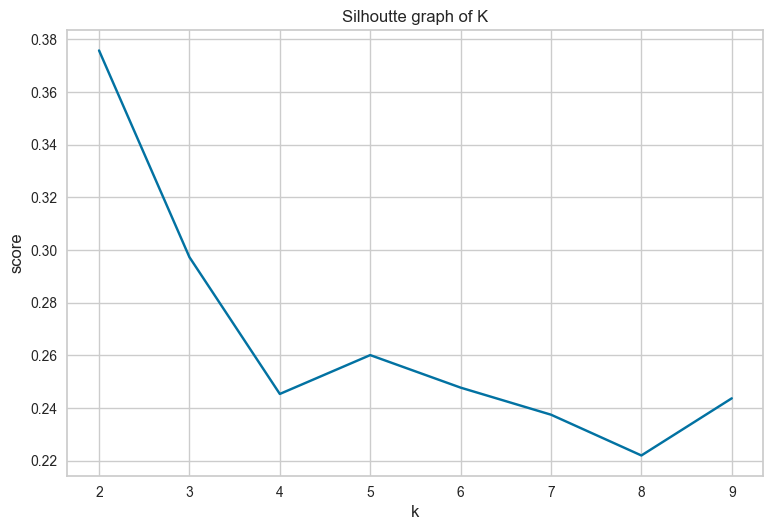

In [65]:
data = pd.DataFrame({'k': range(2, 10), 'score': km_score})
sns.lineplot(x='k', y='score', data=data)
plt.title("Silhoutte graph of K")
plt.show()

#### 2 - with Elbow Method

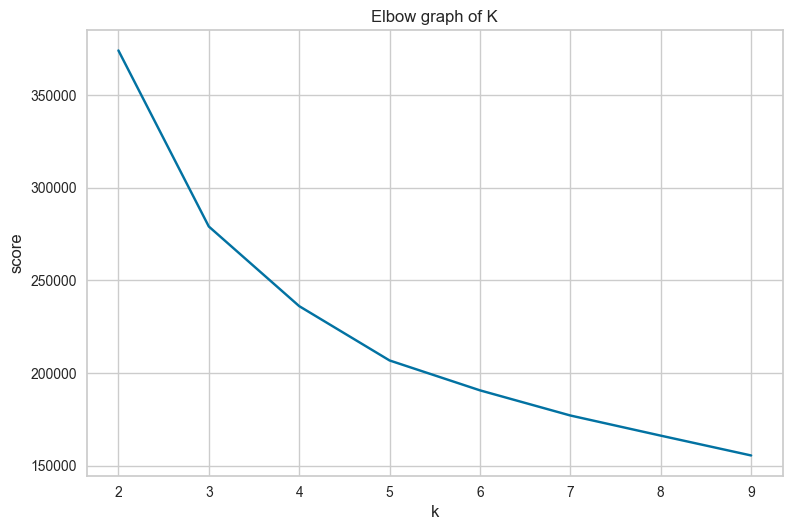

In [66]:
data = pd.DataFrame({'k': range(2, 10), 'score': km_inertia})
sns.lineplot(x='k', y='score', data=data)
plt.title("Elbow graph of K")
plt.show()

### Modelling with K-Means Clustering

In [68]:
km = KMeans(n_clusters=5).fit(X)

In [69]:
X['Label'] = km.labels_
X

,Gender,Age,Chest pain,Shortness of breath,Fatigue,Systolic,Diastolic,Heart rate (bpm),Lung sounds,Cholesterol level (mg/dL),...,Joint pain,Alcoholism,Hypertension,Fainting,Dizziness,Smoking,High cholesterol,Obesity,Murmur,Label
0,1,55,1,1,1,140,90,100,1,220,...,0,0,1,0,0,1,1,0,1,3
1,0,57,1,1,1,150,80,110,1,210,...,0,0,1,0,0,1,1,0,1,0
2,1,60,1,1,1,130,85,95,1,230,...,0,0,1,0,0,1,1,0,1,3
3,0,62,1,1,1,145,90,100,1,240,...,0,0,1,0,0,1,1,0,1,3
4,1,58,1,1,1,135,80,105,1,220,...,0,0,1,0,0,1,1,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,1,55,1,1,1,130,80,120,1,190,...,0,0,0,0,0,1,0,0,1,4
330,0,48,1,1,1,130,80,120,1,190,...,0,0,0,0,0,0,0,0,1,4
331,1,65,1,1,1,140,90,110,1,220,...,0,0,1,0,0,0,1,0,1,3
332,0,68,1,1,1,140,90,110,0,220,...,0,0,1,0,0,1,1,0,1,3


In [77]:
X['Label'].unique()
X['Label'].count()
y.count()

334

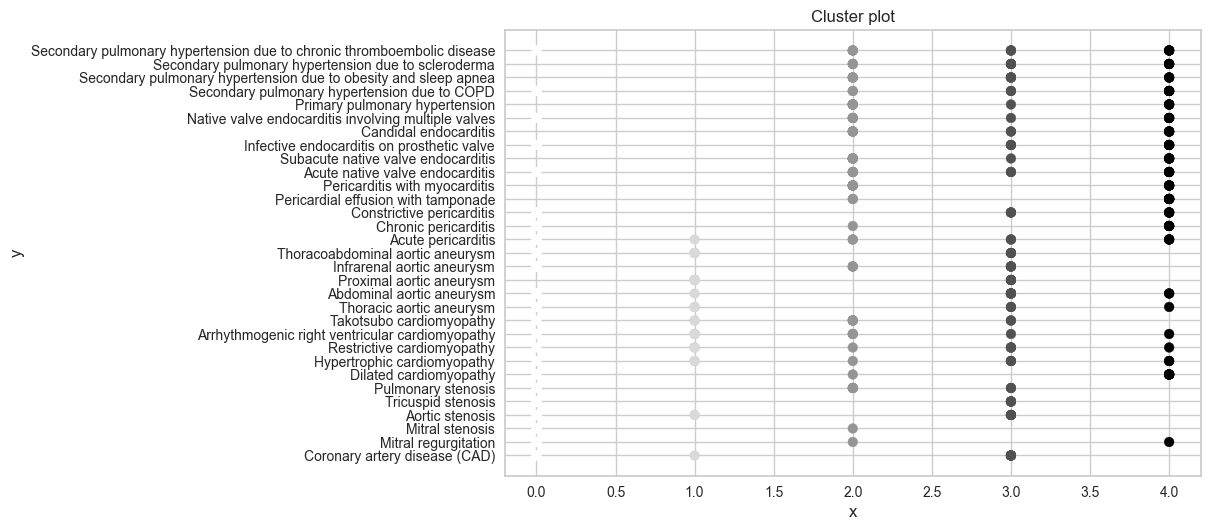

In [80]:
# plot the data points, colored by cluster label
plt.scatter(X['Label'], y, c=X['Label'])

# set the title and axis labels
plt.title('Cluster plot')
plt.xlabel('x')
plt.ylabel('y')

# show the plot
plt.show()